# PCA from Scratch Challenge
## Linear Algebra Foundations

This notebook implements Principal Component Analysis from scratch:
- Calculate covariance matrix
- Compute eigenvectors and eigenvalues
- Project data onto principal components
- Apply to Iris dataset
- Compare with sklearn.decomposition.PCA


## Principal Component Analysis

A technique to reduce dimensionality of complex data while keeping as much important data as possible.

Core idea is to find the bets viewpoints where data is most spread out. Most important directions in data (most spread) are eigenvectors of the 'covariance matrix'. Amount of spread is measured by the eigenvalue. Largest value is the most important direction, called the First Principal component.

### Steps

#### Standardize the data

Put all variables on the same scale by finding variance. Standardization gives each variable a mean of 0 and a standard deviation of 1 to put all variables on a level playing field.

Example:

$$\text{data} = \begin{bmatrix} 1 & 2 \\ 3 & 6 \end{bmatrix}$$

For each column, standized value = (originalval - mean) / standard_deviation

$$\text{data} = \begin{bmatrix} -1 & -1 \\ 1 & 1 \end{bmatrix}$$

Notice, mean of each column is now 0.

#### Calculate the Covariance Matrix

Summarized the relations between our features
- Values on the main diagnal tell us the variance of each feature (how much it spreads on its own)
- Other values tell us the covariance between features (how they change together)
 
$$\text{Covariance Matrix} = \frac{1}{n-1} \text{data}^T \times \text{data}$$

#### Find Eigenvectors and Eigenvalues

Eigenvalues of the covariance matrix tell us what the principal components are. 
The vector for the largest Eigenvalues are the 'best viewport' for our data.

#### Reduce Dimensions

Use top eigenvector to create a new simpler representsation of our data.


In [12]:
import numpy as np

data = np.array([[1, 2], [3, 6]])
#stdData = np.array([[-1, -1], [1, 1]])
stdData = (data - data.mean(axis=0)) / data.std(axis=0)

cov = np.cov(stdData.T)

# M = np.array([[-1, -1], [1, 1]])
# cov = M.T @ M # / (M.shape[0] - 1)

print("convariance\n", cov)

eigenvalues, eigenvectors = np.linalg.eig(cov)

print(eigenvalues)
print(eigenvectors)

print("PC1\n", eigenvalues[0])
print("Best viewport\n", eigenvectors[:, 0])

transformed_data = stdData @ eigenvectors[:, 0]

print("transformed_data\n", transformed_data)


convariance
 [[2. 2.]
 [2. 2.]]
[4.0000000e+00 4.4408921e-16]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
PC1
 4.0
Best viewport
 [0.70710678 0.70710678]
transformed_data
 [-1.41421356  1.41421356]


In [14]:
import numpy as np

data = np.array([[1, 2], [3, 6]])
stdData = (data - data.mean(axis=0)) / data.std(axis=0)
covariance = np.cov(stdData.T)

eigenvalues, eigenvectors = np.linalg.eig(covariance)

# Sort eigenvalues and eigenvectors by eigenvalue size (descending order)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

transformed_data = stdData @ eigenvectors[:, 0] # 0 is the largest eigenvector

print("transformed_data\n", transformed_data)

transformed_data
 [-1.41421356  1.41421356]


Generating plot: standardized_data.png


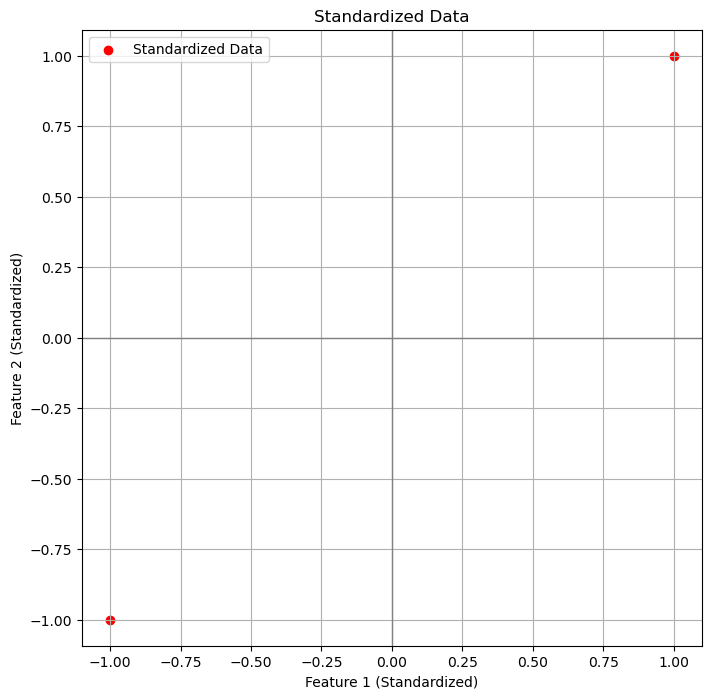

Generating plot: principal_components.png


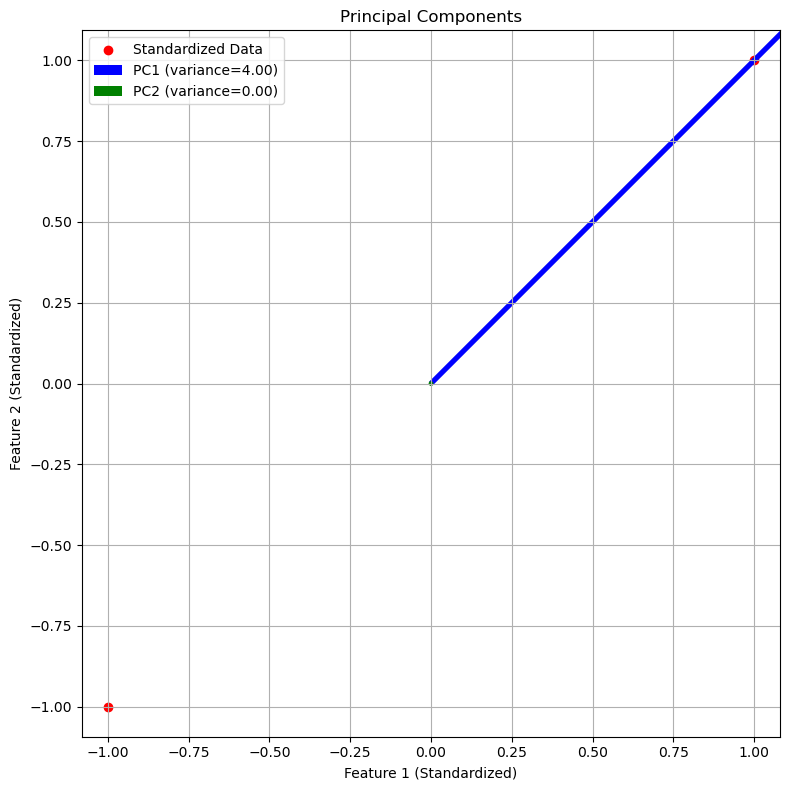

In [17]:
import matplotlib.pyplot as plt

# Plot 1: Standardized Data
print("Generating plot: standardized_data.png")
plt.figure(figsize=(8, 8))
plt.scatter(stdData[:, 0], stdData[:, 1], color='red', label='Standardized Data')
plt.title('Standardized Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

# Plot 2: Principal Components
print("Generating plot: principal_components.png")
plt.figure(figsize=(8, 8))
plt.scatter(stdData[:, 0], stdData[:, 1], color='red', label='Standardized Data')

# Plot the eigenvectors as arrows
origin = [0, 0] # Start arrows at the origin
for i in range(len(eigenvalues)):
    eigenvector = eigenvectors[:, i]
    # Scale the arrow by the sqrt of its eigenvalue to show its importance
    plt.quiver(*origin, *(eigenvector * np.sqrt(eigenvalues[i])),
               color=['blue', 'green'][i], scale_units='xy', scale=1,
               label=f'PC{i+1} (variance={eigenvalues[i]:.2f})')

plt.title('Principal Components')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()